# **Redes Lineales Profundas**

### Iván Vázquez y Juan Daniel Rosales

Aunque estas redes tienen una relación lineal entre entrada y salida, su **dinámica de aprendizaje** bajo descenso de gradiente presenta comportamientos no triviales. La construcción de estas redes propone:

1. **Fenómenos No Lineales**:  
   - Mesetas largas en el error durante el entrenamiento.  
   - Transiciones rápidas hacia soluciones óptimas.

2. **Dinámica del Aprendizaje**:  
   El modelo utiliza ecuaciones diferenciales no lineales para describir la evolución de los pesos, incluso en un sistema lineal.

3. **Evaluación con Correlación**:  
   La correlación entre los valores predichos y reales es un indicador clave del progreso del modelo.

---

### **Objetivo del Código**  
Implementar un **modelo lineal profundo** que:  
- Aprende una relación lineal entre datos de entrada y salida.  
- Grafica la **evolución de la correlación** entre los datos reales y las predicciones durante el entrenamiento.  
- Permite visualizar cómo se ajusta el modelo conforme avanza la optimización.

Este ejercicio proporciona una herramienta para comprender y visualizar las dinámicas de aprendizaje de las redes lienales profundas, aplicando conceptos matemáticos y prácticos en redes neuronales profundas.

## Fundamentos matemáticos

### **1. Ecuaciones Diferenciales No Lineales**
- Aunque las redes son lineales, la actualización de los pesos durante el entrenamiento está gobernada por ecuaciones diferenciales no lineales:  
  \[
  \frac{dW}{dt} = f(W, X, Y)
  \]
  donde:  
  - \( W \): Pesos de la red.  
  - \( X \): Datos de entrada.  
  - \( Y \): Valores reales.

---

### **2. Optimización con Descenso de Gradiente**
- Objetivo: Minimizar la **pérdida cuadrática media (MSE)**:  
  \[
  \mathcal{L}(W) = \frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2
  \]
  donde \( Y_i \) son los valores reales y \( \hat{Y}_i \) los predichos.  

- **Actualización de pesos**:  
  \[
  W \leftarrow W - \eta \nabla_W \mathcal{L}(W)
  \]
  - \( \eta \): Tasa de aprendizaje.  

---

### **3. Producto Matricial**
- Las redes lineales aplican **productos matriciales sucesivos**:  
  \[
  \hat{Y} = W_2 \cdot (W_1 \cdot X)
  \]
  donde:  
  - \( X \): Matriz de entrada.  
  - \( W_1, W_2 \): Pesos de las capas.  
  - \( \hat{Y} \): Salida predicha.

---

### **4. Correlación de Pearson**
- Se utiliza para medir la similitud entre valores reales \( Y \) y predichos \( \hat{Y} \):  
  \[
  r = \frac{\text{Cov}(Y, \hat{Y})}{\sigma_Y \cdot \sigma_{\hat{Y}}}
  \]
  donde:  
  - \( \text{Cov}(Y, \hat{Y}) \): Covarianza entre \( Y \) y \( \hat{Y} \).  
  - \( \sigma_Y, \sigma_{\hat{Y}} \): Desviaciones estándar.

---

### **5. Descomposición en Valores Singulares (SVD)**
- La SVD ayuda a analizar cómo las matrices de pesos capturan las correlaciones en los datos:  
  \[
  A = U \Sigma V^T
  \]
  donde:  
  - \( A \): Matriz original.  
  - \( U \): Autovectores izquierdos.  
  - \( \Sigma \): Valores singulares.  
  - \( V^T \): Autovectores derechos.

---

### **6. Regímenes de Optimización**
- El aprendizaje lineal presenta comportamientos **no triviales**:  
  - **Mesetas**: Progreso lento del error.  
  - **Transiciones Rápidas**: Mejora abrupta en el rendimiento.

---

### **7. Estabilidad del Sistema**
- Se analizan condiciones de estabilidad para asegurar que los pesos no diverjan durante el entrenamiento.  
- Esto incluye controlar la magnitud de los gradientes y la convergencia de la pérdida.


Epoch 0, Loss: 5.6104, Correlación: 0.0949
Epoch 50, Loss: 4.8609, Correlación: 0.8355
Epoch 100, Loss: 1.5811, Correlación: 0.8475
Epoch 150, Loss: 0.5648, Correlación: 0.9500
Epoch 200, Loss: 0.2126, Correlación: 0.9811
Epoch 250, Loss: 0.0211, Correlación: 0.9982
Epoch 300, Loss: 0.0102, Correlación: 0.9991
Epoch 350, Loss: 0.0100, Correlación: 0.9991
Epoch 400, Loss: 0.0100, Correlación: 0.9991
Epoch 450, Loss: 0.0100, Correlación: 0.9991


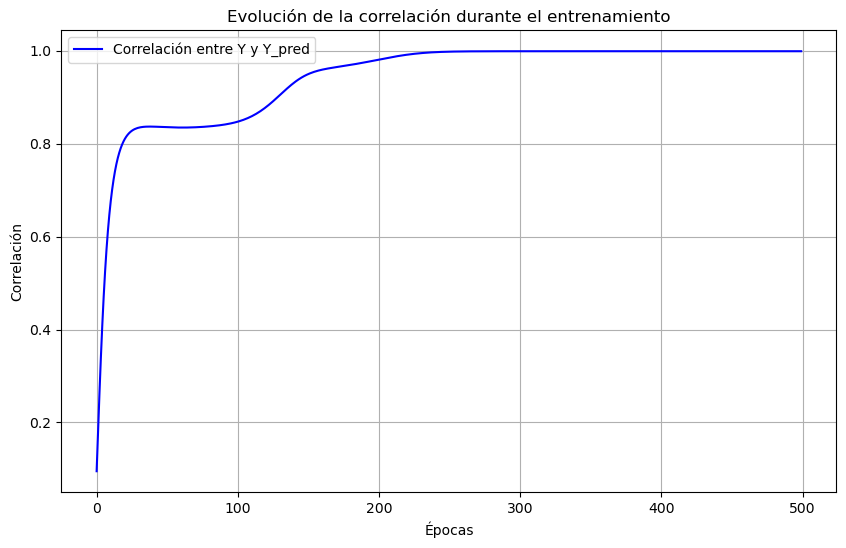

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del modelo
np.random.seed(42)
input_dim = 5  # Dimensión de entrada
hidden_dim = 4  # Dimensión oculta
output_dim = 3  # Dimensión de salida
num_samples = 200  # Número de muestras

# Generar datos de entrada y salida
X = np.random.randn(num_samples, input_dim)
true_weights = np.random.randn(input_dim, output_dim)
Y = X @ true_weights + 0.1 * np.random.randn(num_samples, output_dim)  # Salida con ruido

# Inicialización de los pesos
W1 = np.random.randn(input_dim, hidden_dim) * 0.01
W2 = np.random.randn(hidden_dim, output_dim) * 0.01

# Parámetros de entrenamiento
learning_rate = 0.01
epochs = 500
correlations = []

# Función para calcular la pérdida
def compute_loss(Y, Y_pred):
    return np.mean((Y - Y_pred)**2)

# Entrenamiento del modelo
for epoch in range(epochs):
    # Forward pass
    H = X @ W1
    Y_pred = H @ W2

    # Cálculo de correlación entre Y y Y_pred
    correlation = np.corrcoef(Y.flatten(), Y_pred.flatten())[0, 1]
    correlations.append(correlation)

    # Gradientes
    grad_Y_pred = 2 * (Y_pred - Y) / num_samples
    grad_W2 = H.T @ grad_Y_pred
    grad_H = grad_Y_pred @ W2.T
    grad_W1 = X.T @ grad_H

    # Actualización de los pesos
    W1 -= learning_rate * grad_W1
    W2 -= learning_rate * grad_W2

    # Mostrar progreso
    if epoch % 50 == 0:
        loss = compute_loss(Y, Y_pred)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Correlación: {correlation:.4f}")

# Gráfica de la correlación durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(correlations, label='Correlación entre Y y Y_pred', color='b')
plt.xlabel('Épocas')
plt.ylabel('Correlación')
plt.title('Evolución de la correlación durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

## **Conclusión**

Este experimento demuestra cómo una red neuronal **lineal profunda** puede aprender y capturar relaciones complejas entre datos de entrada y salida, incluso cuando la arquitectura subyacente es lineal. Las principales observaciones del entrenamiento incluyen:

1. **Correlación Progresiva**:  
   La correlación entre las salidas reales (\(Y\)) y las predichas (\(\hat{Y}\)) mejora significativamente a medida que avanzan las épocas, alcanzando valores cercanos a 1.

2. **Convergencia del Modelo**:  
   El descenso de gradiente optimiza los pesos de manera efectiva, mostrando fases iniciales de ajuste rápido seguidas de una convergencia gradual.

3. **Dinamismo del Aprendizaje**:  
   Aunque el modelo es lineal, la combinación de múltiples capas y el ajuste incremental de los pesos produce comportamientos no triviales, como **mesetas** y **transiciones rápidas** en la evolución de la correlación.

### **Reflexión Final**  
Este análisis respalda la idea de que las redes lineales profundas son un marco útil para comprender las dinámicas del aprendizaje en modelos más complejos. Los conceptos matemáticos subyacentes, como la optimización con descenso de gradiente y la correlación estadística, permiten visualizar cómo el modelo ajusta sus predicciones para representar mejor los datos.

La gráfica final de la **evolución de la correlación** muestra claramente cómo el modelo logra capturar la estructura del problema a lo largo del entrenamiento.
